In [1]:
from Antispoofing.SIWAntispoof.siw_antispoof_helper import get_siw_protocol_frame_dic, get_siw_train_frame_func
import pandas as pd
import os
from Helpers.image_helper import obtain_file_paths, create_image_grid_from_paths



In [6]:
dataset_root = "/home/jarred/Documents/Datasets/SIW"
dataset_csv = "siw.csv"

dataset_root = "/home/jarred/Documents/Datasets/CASIA"
dataset_csv = "casia.csv"
train_subject_number = 1
# test_subject_number = 75
test_subject_number = 1

In [3]:
combinations = ['ASUS-IP7P-IPP2017' ,'ASUS-IP7P-SGS8', 'ASUS-IPP2017-SGS8', 'IP7P-IPP2017-SGS8', 'P', 'R']

In [4]:
sorted_keys = [
    "N1", "C1", "W1", "R1",
    "N2", "C2", "W2", "R2",
    "N_HR", "C_HR", "W_HR", "R_HR",

# 'N1', 'N2', 'N_HR',
# 'C1', 'C2', 'C_HR',
# 'R1', 'R2', 'R_HR',
# 'W1', 'W2', 'W_HR',
]

In [17]:
import matplotlib.pyplot as plt
plt.style.use('default')
def create_display_grid(dframe, subject_number, dataset_root, title, dataset_name, num_cols=6, sort_keys = None, scale=3):
    file_paths = []
    titles = []
    info_dic = {}
    for row in dframe.to_dict(orient='record'):
        frame_index = int(row['frames_present']/2)
        full_path = os.path.join(dataset_root, row['directory_path'])
        paths = obtain_file_paths(full_path, r"^frame")
        file_paths.append(paths[frame_index])
        save_name = f"{dataset_name}_{subject_number}"
        av = row['attack_category']
        if "HR" in av:
            av = f"{av[-1]}_HR"
        title_string = f"ST: {av}"
        if "medium_name" in row:
            title_string += f" | M: {row['medium_name']}"
        # if "sensor_id" in row:
        #     title_string += f" | C: {row['sensor_id']}"
        if "session_id" in row:
            title_string += f" | S: {row['session_id']}"
        info_dic[title_string] = paths[frame_index]
        titles.append(title_string)#| M: {row['medium_name']}")# | S: {row['sensor_name']}")
    if sort_keys is not None:
        temp_dic = {}
        for key in sort_keys:
            tempkey = f"ST: {key}"
            temp_dic[tempkey] = info_dic[tempkey]
        info_dic = temp_dic
    file_paths = list(info_dic.values())
    titles = list(info_dic.keys())
    titles = [t.split(" | S")[0] for t in titles]
    # titles = [t.split(" | C")[0] for t in titles]
    create_image_grid_from_paths(file_paths,class_names=titles, file_name=f"S{subject_number}_{save_name}.pdf", title=title, must_show=False,num_cols=num_cols, fontsize=10, scale=scale)
    return file_paths, titles




/tmp/ipykernel_189505/363421231.py:7: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  for row in dframe.to_dict(orient='record'):


(['/home/jarred/Documents/Datasets/CASIA/train/real/1/1-1/frame_63.png',
  '/home/jarred/Documents/Datasets/CASIA/train/spoof/1/1-5/frame_63.png',
  '/home/jarred/Documents/Datasets/CASIA/train/spoof/1/1-3/frame_84.png',
  '/home/jarred/Documents/Datasets/CASIA/train/spoof/1/1-7/frame_63.png',
  '/home/jarred/Documents/Datasets/CASIA/train/real/1/1-2/frame_50.png',
  '/home/jarred/Documents/Datasets/CASIA/train/spoof/1/1-6/frame_84.png',
  '/home/jarred/Documents/Datasets/CASIA/train/spoof/1/1-4/frame_46.png',
  '/home/jarred/Documents/Datasets/CASIA/train/spoof/1/1-8/frame_46.png',
  '/home/jarred/Documents/Datasets/CASIA/train/real/1/1-HR_1/frame_12.png',
  '/home/jarred/Documents/Datasets/CASIA/train/spoof/1/1-HR_3/frame_63.png',
  '/home/jarred/Documents/Datasets/CASIA/train/spoof/1/1-HR_2/frame_84.png',
  '/home/jarred/Documents/Datasets/CASIA/train/spoof/1/1-HR_4/frame_84.png'],
 ['ST: N1',
  'ST: C1',
  'ST: W1',
  'ST: R1',
  'ST: N2',
  'ST: C2',
  'ST: W2',
  'ST: R2',
  'ST:

In [19]:
# df = pd.read_csv(os.path.join(dataset_root, dataset_csv)).query(f"subject_number == {test_subject_number}").sort_values('attack_category')
df = pd.read_csv(os.path.join(dataset_root, dataset_csv)).query(f"subject_number == {test_subject_number} and usage_type == 'test'").sort_values('attack_category')
df.head(30)

,usage_type,ground_truth,subject_number,video_name,video_frames,frames_present,attack_category,directory_path
7,test,spoof,1,5.avi,150.0,150,C1,test/spoof/1/1-5
5,test,spoof,1,6.avi,195.0,195,C2,test/spoof/1/1-6
2,test,spoof,1,HR_3.avi,93.0,91,HR_C,test/spoof/1/1-HR_3
271,test,real,1,HR_1.avi,132.0,130,HR_N,test/real/1/1-HR_1
0,test,spoof,1,HR_4.avi,115.0,115,HR_R,test/spoof/1/1-HR_4
1,test,spoof,1,HR_2.avi,249.0,247,HR_W,test/spoof/1/1-HR_2
270,test,real,1,1.avi,161.0,161,N1,test/real/1/1-1
272,test,real,1,2.avi,133.0,133,N2,test/real/1/1-2
6,test,spoof,1,7.avi,115.0,115,R1,test/spoof/1/1-7
8,test,spoof,1,8.avi,89.0,89,R2,test/spoof/1/1-8


In [20]:
create_display_grid(df, test_subject_number, dataset_root, None, "CASIA", num_cols=4, scale=2, sort_keys=sorted_keys)
# paths, titles = create_display_grid(df, test_subject_number, dataset_root, None, "SIW", num_cols=4, scale=2)

/tmp/ipykernel_189505/363421231.py:7: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  for row in dframe.to_dict(orient='record'):


(['/home/jarred/Documents/Datasets/CASIA/test/real/1/1-1/frame_89.png',
  '/home/jarred/Documents/Datasets/CASIA/test/spoof/1/1-5/frame_46.png',
  '/home/jarred/Documents/Datasets/CASIA/test/spoof/1/1-3/frame_63.png',
  '/home/jarred/Documents/Datasets/CASIA/test/spoof/1/1-7/frame_84.png',
  '/home/jarred/Documents/Datasets/CASIA/test/real/1/1-2/frame_50.png',
  '/home/jarred/Documents/Datasets/CASIA/test/spoof/1/1-6/frame_84.png',
  '/home/jarred/Documents/Datasets/CASIA/test/spoof/1/1-4/frame_63.png',
  '/home/jarred/Documents/Datasets/CASIA/test/spoof/1/1-8/frame_12.png',
  '/home/jarred/Documents/Datasets/CASIA/test/real/1/1-HR_1/frame_12.png',
  '/home/jarred/Documents/Datasets/CASIA/test/spoof/1/1-HR_3/frame_84.png',
  '/home/jarred/Documents/Datasets/CASIA/test/spoof/1/1-HR_2/frame_84.png',
  '/home/jarred/Documents/Datasets/CASIA/test/spoof/1/1-HR_4/frame_84.png'],
 ['ST: N1',
  'ST: C1',
  'ST: W1',
  'ST: R1',
  'ST: N2',
  'ST: C2',
  'ST: W2',
  'ST: R2',
  'ST: N_HR',
  'S

In [47]:
for combination in combinations:
   # get the test frame
    protocol_frame_dic = get_siw_protocol_frame_dic(dataset_root, dataset_csv, [combination], test_subject_number)
    for protocol_name, protocol_number_frame in protocol_frame_dic.items():
        protocol_number = protocol_number_frame["protocol_number"]
        protocol_frame = protocol_number_frame["frame"]
        create_display_grid(protocol_frame, test_subject_number, dataset_root, protocol_number, protocol_name)
    # get the train frame
    train_frame = get_siw_train_frame_func(dataset_root, dataset_csv, [combination], train_subject_number)



    create_display_grid(train_frame, train_subject_number, dataset_root, protocol_number, protocol_name)




/tmp/ipykernel_3108630/3038007830.py:4: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  for row in dframe.to_dict(orient='record'):
/tmp/ipykernel_3108630/3038007830.py:4: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  for row in dframe.to_dict(orient='record'):
/tmp/ipykernel_3108630/3038007830.py:4: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  for row in dframe.to_dict(orient='record'):
/tmp/ipykernel_3108630/3038007830.py:4: FutureWarning: Using short name for 'orient' is deprecated. Only t

TypeError: get_siw_protocol_frame_dic() missing 1 required positional argument: 'test_subject_number'

In [25]:
df = pd.read_csv(os.path.join(dataset_root, dataset_csv))

In [26]:
df = df.query(f"subject_number == {subject_number}")

In [27]:
df.head(30)

,usage_type,ground_truth,subject_number,video_name,frames_present,video_frames,attack_category,directory_path,sensor_id,sensor_name,type_id,type_name,medium_id,medium_name,session_id,session_name
1077,test,spoof,90,090-2-3-4-2.mov,450,480.0,R,test/spoof/90/090-2-3-4-2,2,Logitech_C920_Webcam,3,Replay,4,SGS8,2,RS
1078,test,spoof,90,090-1-3-1-1.mov,450,480.0,R,test/spoof/90/090-1-3-1-1,1,Canon_EOS_T6,3,Replay,1,IPP2017,1,RS
1079,test,spoof,90,090-1-3-2-2.mov,451,465.0,R,test/spoof/90/090-1-3-2-2,1,Canon_EOS_T6,3,Replay,2,IP7P,2,RS
1080,test,spoof,90,090-2-3-4-1.mov,450,479.0,R,test/spoof/90/090-2-3-4-1,2,Logitech_C920_Webcam,3,Replay,4,SGS8,1,RS
1081,test,spoof,90,090-2-3-3-1.mov,446,472.0,R,test/spoof/90/090-2-3-3-1,2,Logitech_C920_Webcam,3,Replay,3,ASUS,1,RS
1082,test,spoof,90,090-2-3-1-2.mov,451,484.0,R,test/spoof/90/090-2-3-1-2,2,Logitech_C920_Webcam,3,Replay,1,IPP2017,2,RS
1083,test,spoof,90,090-1-3-2-1.mov,450,486.0,R,test/spoof/90/090-1-3-2-1,1,Canon_EOS_T6,3,Replay,2,IP7P,1,RS
1084,test,spoof,90,090-1-3-1-2.mov,451,480.0,R,test/spoof/90/090-1-3-1-2,1,Canon_EOS_T6,3,Replay,1,IPP2017,2,RS
1085,test,spoof,90,090-2-3-2-2.mov,450,480.0,R,test/spoof/90/090-2-3-2-2,2,Logitech_C920_Webcam,3,Replay,2,IP7P,2,RS
1086,test,spoof,90,090-1-2-2-2.mov,391,391.0,P,test/spoof/90/090-1-2-2-2,1,Canon_EOS_T6,2,Print,2,LR,2,MP


/tmp/ipykernel_3108630/1786015034.py:3: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  for row in df.to_dict(orient='record'):


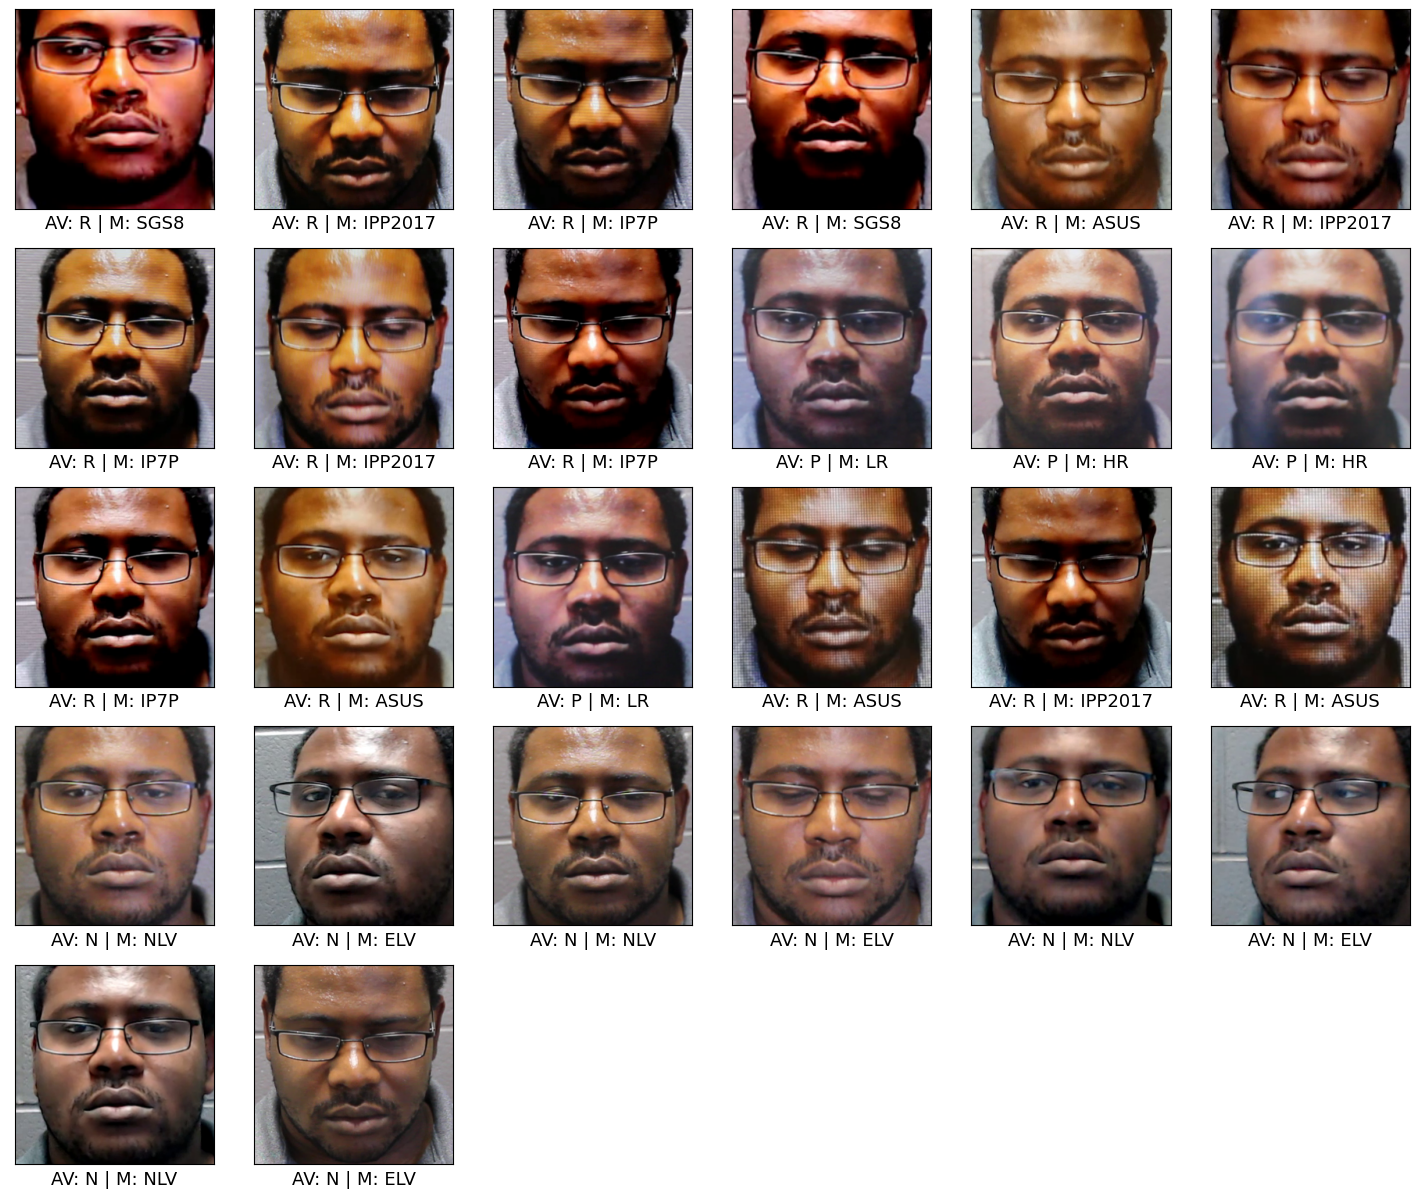

'S90.pdf'